In [1]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [9]:
import cv2
import imutils
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import requests
import time
from base64 import b64encode
from IPython.display import Image
from pylab import rcParams

In [7]:
rcParams['figure.figsize'] = 10, 20

In [10]:
def makeImageData(imgpath):
    img_req = None
    with open(imgpath, 'rb') as f:
        ctxt = b64encode(f.read()).decode()
        img_req = {
            'image': {
                'content': ctxt
            },
            'features': [{
                'type': 'DOCUMENT_TEXT_DETECTION',
                'maxResults': 1
            }]
        }
    return json.dumps({"requests": img_req}).encode()

In [11]:
def requestOCR(url, api_key, imgpath):
  imgdata = makeImageData(imgpath)
  response = requests.post(ENDPOINT_URL, 
                           data = imgdata, 
                           params = {'key': api_key}, 
                           headers = {'Content-Type': 'application/json'})
  return response

In [12]:
with open('vision_api.json') as f:
    data = json.load(f)

In [13]:
ENDPOINT_URL = 'https://vision.googleapis.com/v1/images:annotate'
api_key = data["api_key"]
img_loc = "Image7.jpeg"

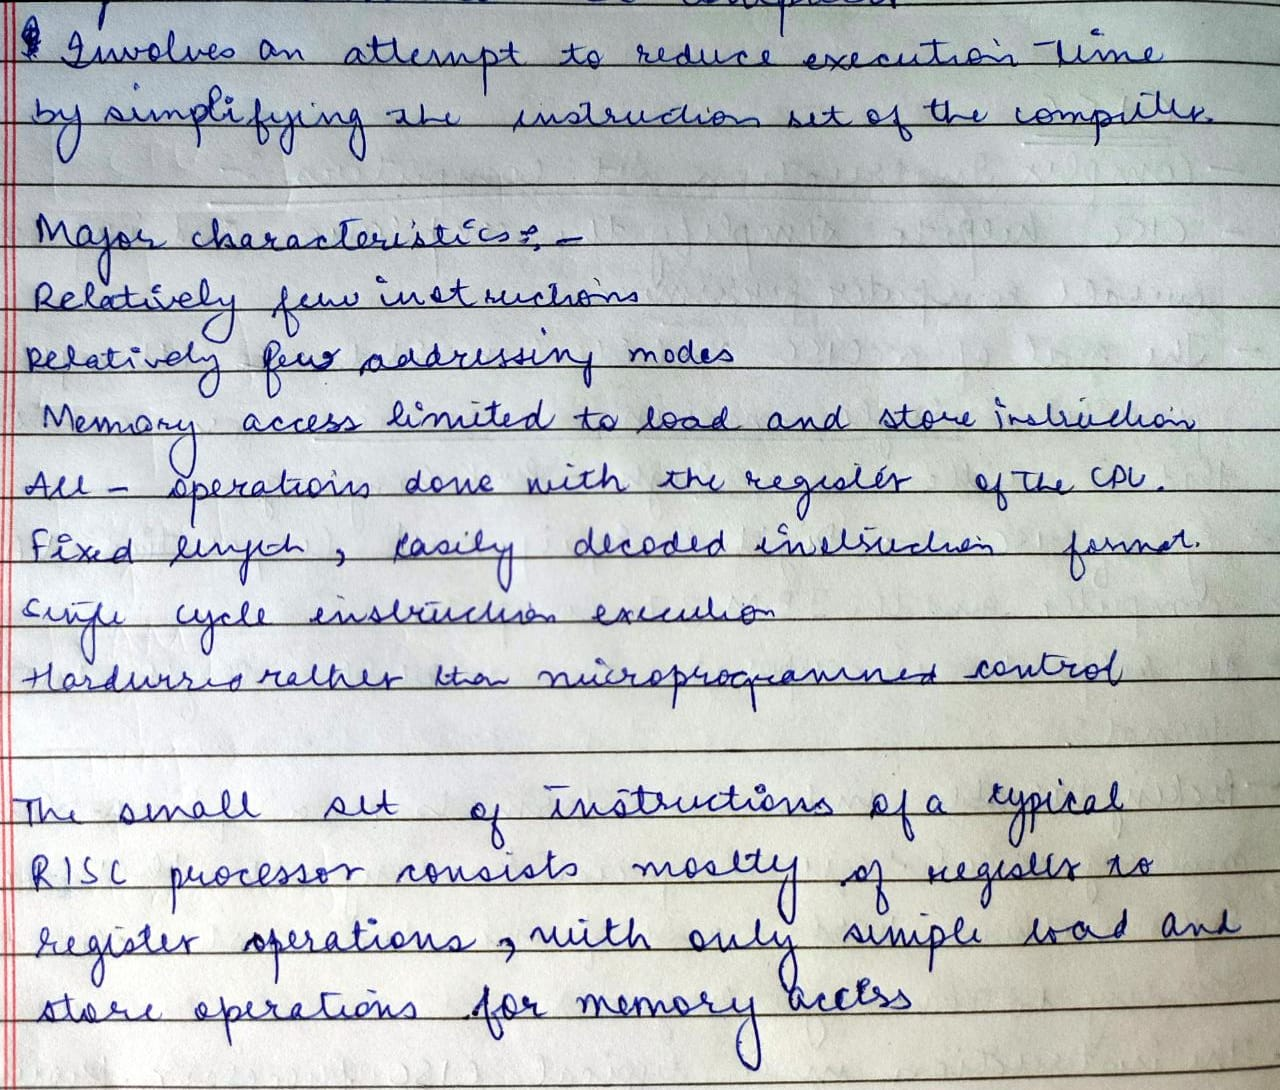

In [14]:
Image(img_loc)

In [15]:
result = requestOCR(ENDPOINT_URL, api_key, img_loc)

In [16]:
if result.status_code != 200 or result.json().get('error'):
    print ("Error")
else:
    result = result.json()['responses'][0]['textAnnotations']

In [17]:
result

[{'locale': 'en',
  'description': 'Memory\nAll\nCPU\nSisvelves an attempt to reduce executiei Time\nline\nby simplifying instrucion set of the computer.\nMajas characteristics\nRelatively few instruction\nRelatively feny addressing modes\naccess limited to load and store instruction\nsperations done with the\nregister of the Cow\nfixed lingth, easily decoded instruction format.\nsingle cycle instruction excution\nHardwirio rather then microproquanines control\nof\ninstructions of a typical\nRISC processor consists mostly of register\nregister operations with only simple wad and\n,\nstore operations for memory\n5\nThe small\nsit\nto\naccess\n',
  'boundingPoly': {'vertices': [{'x': 28, 'y': 13},
    {'x': 1240, 'y': 13},
    {'x': 1240, 'y': 1074},
    {'x': 28, 'y': 1074}]}},
 {'description': 'Memory',
  'boundingPoly': {'vertices': [{'x': 57, 'y': 392},
    {'x': 200, 'y': 398},
    {'x': 196, 'y': 480},
    {'x': 53, 'y': 474}]}},
 {'description': 'All',
  'boundingPoly': {'vertices

In [18]:
for index in range(len(result)):
  print(result[index]["description"])

Memory
All
CPU
Sisvelves an attempt to reduce executiei Time
line
by simplifying instrucion set of the computer.
Majas characteristics
Relatively few instruction
Relatively feny addressing modes
access limited to load and store instruction
sperations done with the
register of the Cow
fixed lingth, easily decoded instruction format.
single cycle instruction excution
Hardwirio rather then microproquanines control
of
instructions of a typical
RISC processor consists mostly of register
register operations with only simple wad and
,
store operations for memory
5
The small
sit
to
access

Memory
All
CPU
Sisvelves
an
attempt
to
reduce
executiei
Time
line
by
simplifying
instrucion
set
of
the
computer
.
Majas
characteristics
Relatively
few
instruction
Relatively
feny
addressing
modes
access
limited
to
load
and
store
instruction
sperations
done
with
the
register
of
the
Cow
fixed
lingth
,
easily
decoded
instruction
format
.
single
cycle
instruction
excution
Hardwirio
rather
then
microproquanines
c

In [19]:
def gen_cord(result):
  cord_df = pd.DataFrame(result['boundingPoly']['vertices'])
  x_min, y_min = np.min(cord_df["x"]), np.min(cord_df["y"])
  x_max, y_max = np.max(cord_df["x"]), np.max(cord_df["y"])
  return result["description"], x_max, x_min, y_max, y_min

Text Detected = access


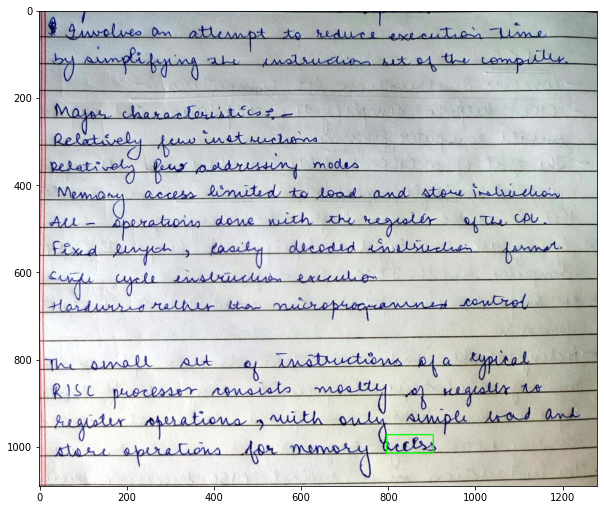

In [20]:
text, x_max, x_min, y_max, y_min = gen_cord(result[-1])
image = cv2.imread(img_loc)
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,255, 0),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print ("Text Detected = {}".format(text))